1) Load Data

In [1]:
import pandas as pd
import json

df = pd.read_csv("../data/processed/cleaned_data.csv")
print(f"Loaded {len(df)} rows")

Loaded 983 rows


2) Create QA Pair Chunks

In [2]:
chunks = []

for idx, row in df.iterrows():
    try:
        qa = json.loads(row['qa'])
        for pair in qa['knowledge']:
            question = pair.get('customer_summary_question', '').strip()
            answer = pair.get('agent_summary_solution', '').strip()
            
            if not question or not answer:
                continue
            
            chunk = {
                "chunk_id": f"qa_{idx}_{len(chunks)}",
                "text": f"Question: {question}\nAnswer: {answer}",
                "question": question,
                "answer": answer,
                "metadata": {
                    "source_row": idx,
                    "chunk_type": "qa_pair",
                    "issue_area": row['issue_area'],
                    "issue_category": row['issue_category'],
                    "product_category": row['product_category'],
                    "customer_sentiment": row['customer_sentiment'],
                    "issue_complexity": row['issue_complexity']
                }
            }
            chunks.append(chunk)
    except:
        continue

print(f"Total QA chunks created: {len(chunks)}")

Total QA chunks created: 1881


3) Preview Chunks

In [3]:
for i in range(3):
    print(f"\n{'='*60}")
    print(f"Chunk {i+1}: {chunks[i]['chunk_id']}")
    print(f"Text:\n{chunks[i]['text'][:300]}")
    print(f"Metadata: {chunks[i]['metadata']}")


Chunk 1: qa_0_0
Text:
Question: How can I log in to my account to purchase an Oven Toaster Grill (OTG) as I'm unable to proceed due to mobile number or email verification?
Answer: After confirming the customer's registered email address, I have sent a verification code to johndoe@email.com. The customer should enter the 
Metadata: {'source_row': 0, 'chunk_type': 'qa_pair', 'issue_area': 'Login and Account', 'issue_category': 'Mobile Number and Email Verification', 'product_category': 'Appliances', 'customer_sentiment': 'neutral', 'issue_complexity': 'medium'}

Chunk 2: qa_1_1
Text:
Question: Why am I being asked to ship back the computer monitor I purchased last week?
Answer: The monitor has been recalled by the manufacturer due to a technical issue. For safety reasons, you need to return the product, and you will receive a full refund.
Metadata: {'source_row': 1, 'chunk_type': 'qa_pair', 'issue_area': 'Cancellations and returns', 'issue_category': 'Pickup and Shipping', 'product_cate

4) Check Chunk Lengths

Min chunk length: 52 chars
Max chunk length: 842 chars
Avg chunk length: 282 chars


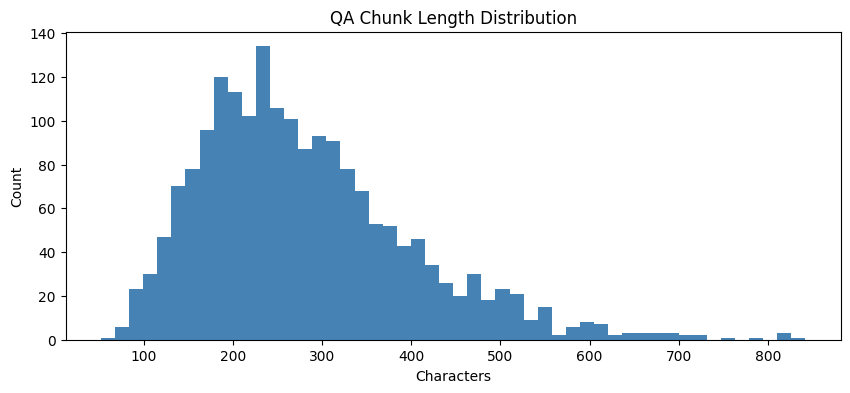

In [4]:
import matplotlib.pyplot as plt

lengths = [len(c['text']) for c in chunks]
print(f"Min chunk length: {min(lengths)} chars")
print(f"Max chunk length: {max(lengths)} chars")
print(f"Avg chunk length: {sum(lengths)/len(lengths):.0f} chars")

plt.figure(figsize=(10, 4))
plt.hist(lengths, bins=50, color='steelblue')
plt.title('QA Chunk Length Distribution')
plt.xlabel('Characters')
plt.ylabel('Count')
plt.show()

5) Save Chunks

In [5]:
chunks_df = pd.DataFrame([
    {
        "chunk_id": c["chunk_id"],
        "text": c["text"],
        "question": c["question"],
        "answer": c["answer"],
        "issue_area": c["metadata"]["issue_area"],
        "issue_category": c["metadata"]["issue_category"],
        "product_category": c["metadata"]["product_category"],
        "customer_sentiment": c["metadata"]["customer_sentiment"],
        "issue_complexity": c["metadata"]["issue_complexity"],
        "source_row": c["metadata"]["source_row"],
        "chunk_type": c["metadata"]["chunk_type"]
    }
    for c in chunks
])

chunks_df.to_csv("../data/processed/qa_chunks.csv", index=False)
print(f"✅ Saved {len(chunks_df)} chunks to data/processed/qa_chunks.csv")
chunks_df.head()

✅ Saved 1881 chunks to data/processed/qa_chunks.csv


,chunk_id,text,question,answer,issue_area,issue_category,product_category,customer_sentiment,issue_complexity,source_row,chunk_type
0,qa_0_0,Question: How can I log in to my account to pu...,How can I log in to my account to purchase an ...,After confirming the customer's registered ema...,Login and Account,Mobile Number and Email Verification,Appliances,neutral,medium,0,qa_pair
1,qa_1_1,Question: Why am I being asked to ship back th...,Why am I being asked to ship back the computer...,The monitor has been recalled by the manufactu...,Cancellations and returns,Pickup and Shipping,Electronics,neutral,less,1,qa_pair
2,qa_1_2,Question: Can you guide me through the process...,Can you guide me through the process of return...,A prepaid shipping label will be sent to you v...,Cancellations and returns,Pickup and Shipping,Electronics,neutral,less,1,qa_pair
3,qa_2_3,Question: I am unable to click the 'Cancel' bu...,I am unable to click the 'Cancel' button for m...,The 'Cancel' button might not be working due t...,Cancellations and returns,Replacement and Return Process,Appliances,neutral,medium,2,qa_pair
4,qa_3_4,Question: What is the issue I am facing?\nAnsw...,What is the issue I am facing?,The agent understood that the customer was fac...,Login and Account,Login Issues and Error Messages,Appliances,neutral,less,3,qa_pair
